**CNN** - Daniel Conrado Monroy Madrid 16012674
*Proyecto final*

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras import optimizers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


Carga y visualización de la data

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)


Los objetos a detectar son (labels):


*   0: airplane
*   1: automobile
*   2: bird
*   3: cat
*   4: deer
*   5: dog
*   6: frog
*   7: horse
*   8: ship
*   9: truck

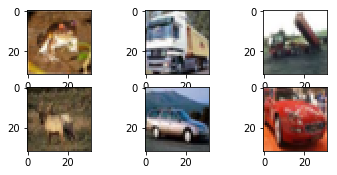

In [16]:
#visualización de las primeras 6 imágenes del train set
for i in range(6):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.show()

In [4]:
#One hot encoding 
train_label = to_categorical(y_train)
test_label = to_categorical(y_test)
train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
#normalizar pixeles
train_new = X_train.astype('float32')/255.0
test_new = X_test.astype('float32')/255.0

# Experimentación

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
optimizador = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_new, train_label, epochs=100,batch_size=64,verbose=1,validation_split=0.4)
_, accuracy = model.evaluate(train_new,train_label,verbose=1)
print('accuracy es: ',(accuracy*100.0))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 30000 samples, validate on 20000 samples
Epoch 1/100
30000/30000 [==============================] - 19s 630us/step - loss: 1.8839 - acc: 0.3231 - val_loss: 1.6105 - val_acc: 0.4240
Epoch 2/100
30000/30000 [==============================] - 12s 385us/step - loss: 1.5073 - acc: 0.4588 - val_loss: 1.4902 - val_acc: 0.4506
Epoch 3/100
30000/30000 [==============================] - 12s 385us/step - loss: 1.3585 - acc: 0.5099 - val_loss: 1.3271 - val_acc: 0.5269
Epoch 4/100
30000/30000 [==============================] - 11s 379us/step - loss: 1.2323 - acc: 0.5600 - val_loss: 1.2381 - val_acc: 0.5592
Epoch 5/100
30000/30000 [==============================] - 11s 380us/step - loss: 1.1282 - acc: 0.5962 - val_loss: 1.1841 - val_acc: 0.5810
Epoch 6/100
30000/30000 [==============================] - 11s 377us/step - loss: 1.0498 - acc: 0.6288 - val_loss: 1.0849 - val_acc: 0.6213
Epoch 7/1

In [12]:
model.evaluate(train_new,train_label,verbose=0)

[1.01741222224897, 0.87878]

In [13]:
model.evaluate(test_new,test_label,verbose=0)

[2.6909587539672852, 0.6882]

Dados los valores de model.evalute, se puede observar que hay presencia de overfitting (0.87 -train accuracy- vs 0.68 -test accuracy-. El siguiente paso consiste en aplicar regularización (dropout) para atacar dicho problema y evaluar de nuevo la métrica. 

In [0]:
def dropout(verb):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  optimizador = optimizers.SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_new, train_label, epochs=100,batch_size=64,verbose=1,validation_split=0.4)
  _, accuracy = model.evaluate(train_new,train_label,verbose=verb)
  c,accuracy_test = model.evaluate(test_new,test_label,verbose=verb)
  return [accuracy,accuracy_test]
  

In [26]:
dropout(1)

Train on 30000 samples, validate on 20000 samples
Epoch 1/100
30000/30000 [==============================] - 13s 435us/step - loss: 2.2335 - acc: 0.1526 - val_loss: 2.1003 - val_acc: 0.2245
Epoch 2/100
30000/30000 [==============================] - 12s 406us/step - loss: 2.0244 - acc: 0.2370 - val_loss: 1.8839 - val_acc: 0.3327
Epoch 3/100
30000/30000 [==============================] - 12s 406us/step - loss: 1.8726 - acc: 0.2902 - val_loss: 1.7401 - val_acc: 0.3633
Epoch 4/100
30000/30000 [==============================] - 12s 407us/step - loss: 1.7706 - acc: 0.3299 - val_loss: 1.6605 - val_acc: 0.3829
Epoch 5/100
30000/30000 [==============================] - 12s 407us/step - loss: 1.7023 - acc: 0.3625 - val_loss: 1.6743 - val_acc: 0.3756
Epoch 6/100
30000/30000 [==============================] - 12s 410us/step - loss: 1.6471 - acc: 0.3863 - val_loss: 1.5401 - val_acc: 0.4361
Epoch 7/100
30000/30000 [==============================] - 12s 404us/step - loss: 1.6010 - acc: 0.4055 - val_l

[0.8577, 0.7938]

Aplicando dropout, el gap entre los accuracy disminuyó (0.85 vs 0.79), lo cual es bueno para el modelo ya que se redujo overfitting. 

En aras de mejorar la métrica, ahora se utiliza GD con Nesterov y 150 epochs. 

In [0]:
def dropout2(epoch):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  optimizador = optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
  model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_new, train_label, epochs=epoch,batch_size=64,verbose=1,validation_split=0.4)
  _, accuracy = model.evaluate(train_new,train_label,verbose=0)
  c,accuracy_test = model.evaluate(test_new,test_label,verbose=0)
  return [accuracy,accuracy_test]

In [33]:
dropout2(150)

Train on 30000 samples, validate on 20000 samples
Epoch 1/150
30000/30000 [==============================] - 14s 459us/step - loss: 2.2559 - acc: 0.1448 - val_loss: 2.0910 - val_acc: 0.2392
Epoch 2/150
30000/30000 [==============================] - 12s 416us/step - loss: 2.0275 - acc: 0.2348 - val_loss: 1.8631 - val_acc: 0.3258
Epoch 3/150
30000/30000 [==============================] - 12s 416us/step - loss: 1.8468 - acc: 0.3050 - val_loss: 1.7123 - val_acc: 0.3836
Epoch 4/150
30000/30000 [==============================] - 13s 417us/step - loss: 1.7342 - acc: 0.3483 - val_loss: 1.6005 - val_acc: 0.4107
Epoch 5/150
30000/30000 [==============================] - 13s 419us/step - loss: 1.6641 - acc: 0.3788 - val_loss: 1.5398 - val_acc: 0.4345
Epoch 6/150
30000/30000 [==============================] - 12s 416us/step - loss: 1.6028 - acc: 0.4059 - val_loss: 1.5012 - val_acc: 0.4553
Epoch 7/150
30000/30000 [==============================] - 12s 416us/step - loss: 1.5496 - acc: 0.4291 - val_l

[0.90166, 0.8119]

In [0]:
def dropout3(epoch):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  #optimizador = optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
  model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_new, train_label, epochs=epoch,batch_size=64,verbose=0,validation_split=0.4)
  _, accuracy = model.evaluate(train_new,train_label,verbose=0)
  c,accuracy_test = model.evaluate(test_new,test_label,verbose=0)
  return [accuracy,accuracy_test]

In [35]:
dropout3(150)

[0.91712, 0.8038]

En los últimos 2 casos, la métrica mejoró. En el segundo caso se utilizó adagrad como optimizador. Ahora se prueba de nuevo Nesterov con distinto learning rate. 

In [0]:
def dropout4(epoch):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  optimizador = optimizers.SGD(lr=0.01, momentum=0.9,nesterov=True)
  model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_new, train_label, epochs=epoch,batch_size=64,verbose=0,validation_split=0.4)
  _, accuracy = model.evaluate(train_new,train_label,verbose=0)
  c,accuracy_test = model.evaluate(test_new,test_label,verbose=0)
  return [accuracy,accuracy_test]

In [42]:
dropout4(150)

[0.89912, 0.8052]

In [0]:
def dropout5(epoch):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='truncated_normal', padding='same', input_shape=(32, 32, 3))) #se prueba otro inicializador
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='truncated_normal', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='truncated_normal', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='truncated_normal', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='truncated_normal', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='truncated_normal', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='truncated_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  optimizador = optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
  model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_new, train_label, epochs=epoch,batch_size=64,verbose=0,validation_split=0.4)
  _, accuracy = model.evaluate(train_new,train_label,verbose=0)
  c,accuracy_test = model.evaluate(test_new,test_label,verbose=0)
  return [accuracy,accuracy_test]

In [10]:
dropout5(100)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[0.87574, 0.7994]

In [11]:
dropout5(150)

[0.92376, 0.8216]

**Comentario/Conclusión**

Varias pruebas arrojaron incrementos en el accuracy tanto de train y test. No obstante, el que mejor desempeño tuvo entre todas las pruebas fue la función llamada "dropout2" (0.9 train vs 0.81 test). Este resultado se logró aplicando dropout, acelearando el gradiente con Nesterov y aumentando el número de epochs a 150. 

No obstante, hay un factor importante: en la función "dropout1" el gap entre los accuracys fue bajo pero los valores fueron menores. Hay dos posibles restos/soluciones para resolver el problema en general: 1) reducir el gap en el "dropou2" para atacar aún mas overfitting o bien 2) seguir experimentado para mejorar el "dropout1" para alzanzar mayores niveles de accuracy.

De igual manera, en la última prueba se experimentó con Batch Normalization y el accuracy mejoró el valor en ambos sets, pero diferencia también lo hizo (10 puntos). 

# **Modelo final**

In [51]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
optimizador = optimizers.SGD(lr=0.001, momentum=0.9,nesterov=True)
model.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_new, train_label, epochs=150,batch_size=64,verbose=1,validation_split=0.4)

Train on 30000 samples, validate on 20000 samples
Epoch 1/150
30000/30000 [==============================] - 14s 452us/step - loss: 2.2638 - acc: 0.1377 - val_loss: 2.1126 - val_acc: 0.2143
Epoch 2/150
30000/30000 [==============================] - 12s 412us/step - loss: 2.0419 - acc: 0.2367 - val_loss: 1.8759 - val_acc: 0.3322
Epoch 3/150
30000/30000 [==============================] - 12s 412us/step - loss: 1.8474 - acc: 0.3053 - val_loss: 1.7680 - val_acc: 0.3377
Epoch 4/150
30000/30000 [==============================] - 12s 412us/step - loss: 1.7354 - acc: 0.3530 - val_loss: 1.6216 - val_acc: 0.4072
Epoch 5/150
30000/30000 [==============================] - 13s 420us/step - loss: 1.6463 - acc: 0.3863 - val_loss: 1.5143 - val_acc: 0.4497
Epoch 6/150
30000/30000 [==============================] - 12s 412us/step - loss: 1.5883 - acc: 0.4100 - val_loss: 1.4729 - val_acc: 0.4616
Epoch 7/150
30000/30000 [==============================] - 12s 411us/step - loss: 1.5349 - acc: 0.4345 - val_l

Gráficas de algunos filtros (canales)

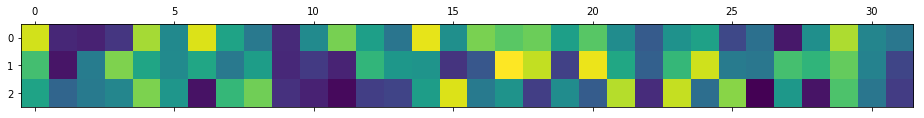

In [56]:
img1 = model.layers[4].get_weights()[0][:,:,:,:]
plt.matshow(img1[0,:,:,5], cmap='viridis')

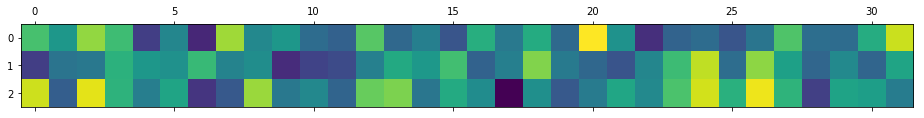

In [57]:
img2 = model.layers[1].get_weights()[0][:,:,:,:]
plt.matshow(img1[0,:,:,4], cmap='viridis')